In [44]:
import requests as rq
import time
import matplotlib.pyplot as plt
from datetime import datetime
URL = 'http://localhost:8080'
DAY = 24 * 60 * 60 * 1000

['0xa4c3f0d3d812']
{'mac_address': '0xa4c3f0d3d812', 'timestamps': [1672679017316, 1672679018321, 1672679019326, 1672679020333, 1672679021338, 1672679022344], 'battery_levels': [99.49658396260338, 99.49658396260338, 99.49658396260338, 99.49658396260338, 99.49658396260338, 99.49658396260338], 'power_plugged': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

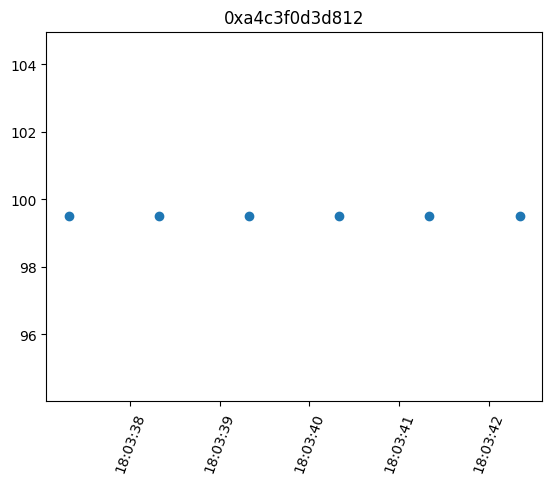

In [50]:
message = rq.get(URL + '/devices').json()
devices = message['mac_addresses']
print(devices)
for device in devices:
    now = round(time.time() * 1000)
    message = rq.get(URL + f'/device/{device}', params = {'from': now - DAY, 'to': now}).json()
    print(message)
    if message['timestamps']:
        plt.title(device)
        dates = [datetime.fromtimestamp(t/1000)for t in message['timestamps']]
        plt.plot_date(dates, message['battery_levels'])
        plt.xticks(rotation=70)
        plt.plot_date(dates, message['power_plugged'])
        plt.xticks(rotation=70)
if devices:
    rq.delete(URL + f'/device/{devices[-1]}')
    